In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv


In [2]:
df=pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

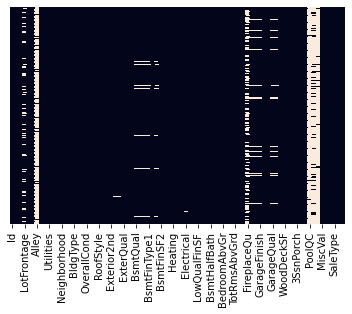

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [6]:
df.shape

(1460, 81)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Filling Missing Values

In [8]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [9]:
df.drop(['Alley'],axis=1,inplace=True)

In [10]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [11]:
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

In [12]:
df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [13]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [14]:
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [15]:
df.shape

(1460, 76)

In [16]:
df.drop(['Id'],axis=1,inplace=True)

In [17]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [18]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

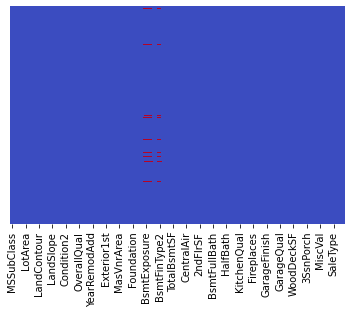

In [19]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [20]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

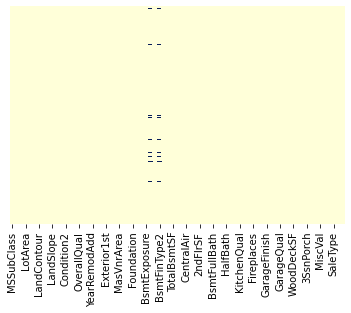

In [21]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [22]:
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [23]:
df.dropna(inplace=True)

In [24]:
df.shape

(1422, 75)

# Handling Categorical Features

In [25]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [26]:
len(columns)

39

In [27]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [28]:
main_df=df.copy()

# Handling Test Data Set

In [29]:
test_df=pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [30]:
test_df.shape

(1459, 80)

In [31]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Check Null Values

In [32]:
test_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

# Filling Missing Values

In [33]:
test_df['LotFrontage']=test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean())

In [34]:
test_df['MSZoning']=test_df['MSZoning'].fillna(test_df['MSZoning'].mode()[0])

In [35]:
test_df.shape

(1459, 80)

In [36]:
test_df.drop(['Alley'],axis=1,inplace=True)

In [37]:
test_df.shape

(1459, 79)

In [38]:
test_df['BsmtCond']=test_df['BsmtCond'].fillna(test_df['BsmtCond'].mode()[0])
test_df['BsmtQual']=test_df['BsmtQual'].fillna(test_df['BsmtQual'].mode()[0])

In [39]:
test_df['FireplaceQu']=test_df['FireplaceQu'].fillna(test_df['FireplaceQu'].mode()[0])
test_df['GarageType']=test_df['GarageType'].fillna(test_df['GarageType'].mode()[0])

In [40]:
test_df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [41]:
test_df.shape

(1459, 78)

In [42]:
test_df['GarageFinish']=test_df['GarageFinish'].fillna(test_df['GarageFinish'].mode()[0])
test_df['GarageQual']=test_df['GarageQual'].fillna(test_df['GarageQual'].mode()[0])
test_df['GarageCond']=test_df['GarageCond'].fillna(test_df['GarageCond'].mode()[0])

test_df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [43]:
test_df.shape

(1459, 75)

In [44]:
test_df.drop(['Id'],axis=1,inplace=True)

In [45]:
test_df['MasVnrType']=test_df['MasVnrType'].fillna(test_df['MasVnrType'].mode()[0])
test_df['MasVnrArea']=test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mode()[0])

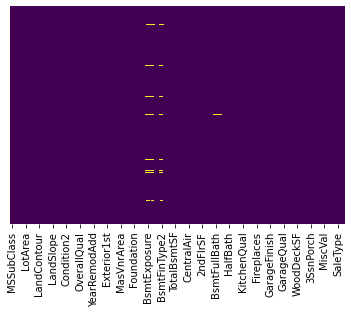

In [46]:
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [47]:
test_df['BsmtExposure']=test_df['BsmtExposure'].fillna(test_df['BsmtExposure'].mode()[0])

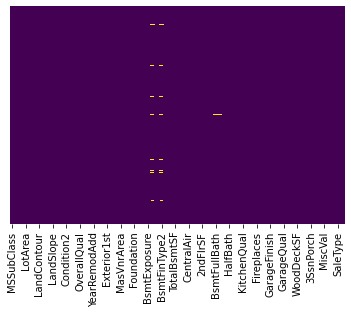

In [48]:
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [49]:
test_df['BsmtFinType2']=test_df['BsmtFinType2'].fillna(test_df['BsmtFinType2'].mode()[0])

In [50]:
test_df.loc[:, test_df.isnull().any()].head()

,Utilities,Exterior1st,Exterior2nd,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,KitchenQual,Functional,GarageCars,GarageArea,SaleType
0,AllPub,VinylSd,VinylSd,Rec,468.0,144.0,270.0,882.0,0.0,0.0,TA,Typ,1.0,730.0,WD
1,AllPub,Wd Sdng,Wd Sdng,ALQ,923.0,0.0,406.0,1329.0,0.0,0.0,Gd,Typ,1.0,312.0,WD
2,AllPub,VinylSd,VinylSd,GLQ,791.0,0.0,137.0,928.0,0.0,0.0,TA,Typ,2.0,482.0,WD
3,AllPub,VinylSd,VinylSd,GLQ,602.0,0.0,324.0,926.0,0.0,0.0,Gd,Typ,2.0,470.0,WD
4,AllPub,HdBoard,HdBoard,ALQ,263.0,0.0,1017.0,1280.0,0.0,0.0,Gd,Typ,2.0,506.0,WD


In [51]:
test_df['Utilities']=test_df['Utilities'].fillna(test_df['Utilities'].mode()[0])
test_df['Exterior1st']=test_df['Exterior1st'].fillna(test_df['Exterior1st'].mode()[0])
test_df['Exterior2nd']=test_df['Exterior2nd'].fillna(test_df['Exterior2nd'].mode()[0])
test_df['BsmtFinType1']=test_df['BsmtFinType1'].fillna(test_df['BsmtFinType1'].mode()[0])
test_df['BsmtFinSF1']=test_df['BsmtFinSF1'].fillna(test_df['BsmtFinSF1'].mean())
test_df['BsmtFinSF2']=test_df['BsmtFinSF2'].fillna(test_df['BsmtFinSF2'].mean())
test_df['BsmtUnfSF']=test_df['BsmtUnfSF'].fillna(test_df['BsmtUnfSF'].mean())
test_df['TotalBsmtSF']=test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].mean())
test_df['BsmtFullBath']=test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].mode()[0])
test_df['BsmtHalfBath']=test_df['BsmtHalfBath'].fillna(test_df['BsmtHalfBath'].mode()[0])
test_df['KitchenQual']=test_df['KitchenQual'].fillna(test_df['KitchenQual'].mode()[0])
test_df['Functional']=test_df['Functional'].fillna(test_df['Functional'].mode()[0])
test_df['GarageCars']=test_df['GarageCars'].fillna(test_df['GarageCars'].mean())
test_df['GarageArea']=test_df['GarageArea'].fillna(test_df['GarageArea'].mean())
test_df['SaleType']=test_df['SaleType'].fillna(test_df['SaleType'].mode()[0])

In [52]:
test_df.shape

(1459, 74)

In [53]:
test_df.to_csv('Updatedtest.csv',index=False)

# Combine Test Data

In [54]:
test_df = pd.read_csv('./Updatedtest.csv')

In [55]:
test_df.shape

(1459, 74)

# Concatenate Train and Test Data

In [56]:
final_df=pd.concat([df,test_df],axis=0)

In [57]:
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2881, dtype: float64

In [58]:
final_df.shape

(2881, 75)

In [59]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [60]:
final_df.shape

(2881, 235)

In [61]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [62]:
final_df.shape

(2881, 175)

In [63]:
final_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,1,1,0,0,0,0,0,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,1,0,0,0,1,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,1,0,0,0,0,1,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,1,1,0,0,0,0,0,0


In [64]:
df_Train=final_df.iloc[:1422,:]
df_Test=final_df.iloc[1422:,:]

In [65]:
df_Train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [66]:
df_Test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,1,1,0,0,0,0,0,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,1,1,0,0,0,0,0,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,1,1,0,0,0,0,0,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,1,1,0,0,0,0,0,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [67]:
df_Train.shape

(1422, 175)

In [68]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

# Using Artifical Neural Network for the training and testing of the data

In [69]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

# Initialising the ANN

In [70]:
classifier = Sequential()

# Adding the input layer and the first hidden layer

In [71]:
classifier.add(Dense(units = 50,activation = 'relu'))

# Adding the second hidden layer

In [72]:
classifier.add(Dense(units = 6,activation = 'relu'))

# Adding the third hidden layer


In [73]:
classifier.add(Dense(units = 6,activation = 'relu'))

# Adding the output layer

In [74]:

classifier.add(Dense(units = 1, activation = 'sigmoid'))


# Compiling the ANN

In [75]:

classifier.compile(loss = 'binary_crossentropy',optimizer = 'Adamax')

# Fitting the ANN to the Training set

In [76]:
model_history=classifier.fit(X_train, y_train,validation_split=0.20, batch_size = 10, epochs = 1000)

Epoch 1/1000
114/114 [==============================] - 0s 3ms/step - loss: -223840320.0000 - val_loss: -536148000.0000
Epoch 2/1000
114/114 [==============================] - 0s 2ms/step - loss: -1152638464.0000 - val_loss: -2073872000.0000
Epoch 3/1000
114/114 [==============================] - 0s 1ms/step - loss: -3796477184.0000 - val_loss: -5631151616.0000
Epoch 4/1000
114/114 [==============================] - 0s 1ms/step - loss: -8020194304.0000 - val_loss: -11071057920.0000
Epoch 5/1000
114/114 [==============================] - 0s 1ms/step - loss: -14944492544.0000 - val_loss: -19943936000.0000
Epoch 6/1000
114/114 [==============================] - 0s 1ms/step - loss: -26137612288.0000 - val_loss: -33581717504.0000
Epoch 7/1000
114/114 [==============================] - 0s 2ms/step - loss: -43859263488.0000 - val_loss: -56051683328.0000
Epoch 8/1000
114/114 [==============================] - 0s 1ms/step - loss: -67184271360.0000 - val_loss: -80959545344.0000
Epoch 9/1000
114/

114/114 [==============================] - 0s 1ms/step - loss: -109311372034048.0000 - val_loss: -113510868582400.0000
Epoch 65/1000
114/114 [==============================] - 0s 2ms/step - loss: -115670406660096.0000 - val_loss: -120192780730368.0000
Epoch 66/1000
114/114 [==============================] - 0s 2ms/step - loss: -122552462606336.0000 - val_loss: -127231821086720.0000
Epoch 67/1000
114/114 [==============================] - 0s 2ms/step - loss: -129607835582464.0000 - val_loss: -134622948098048.0000
Epoch 68/1000
114/114 [==============================] - 0s 1ms/step - loss: -137198720516096.0000 - val_loss: -142471631732736.0000
Epoch 69/1000
114/114 [==============================] - 0s 2ms/step - loss: -144891275378688.0000 - val_loss: -150149238095872.0000
Epoch 70/1000
114/114 [==============================] - 0s 1ms/step - loss: -152769134592000.0000 - val_loss: -158097494507520.0000
Epoch 71/1000
114/114 [==============================] - 0s 2ms/step - loss: -16016

114/114 [==============================] - 0s 2ms/step - loss: -1512999672086528.0000 - val_loss: -1553872728358912.0000
Epoch 126/1000
114/114 [==============================] - 0s 1ms/step - loss: -1563827120373760.0000 - val_loss: -1604488381071360.0000
Epoch 127/1000
114/114 [==============================] - 0s 2ms/step - loss: -1613376413237248.0000 - val_loss: -1655512055676928.0000
Epoch 128/1000
114/114 [==============================] - 0s 2ms/step - loss: -1665386856579072.0000 - val_loss: -1709150157406208.0000
Epoch 129/1000
114/114 [==============================] - 0s 2ms/step - loss: -1719935222939648.0000 - val_loss: -1764951312039936.0000
Epoch 130/1000
114/114 [==============================] - 0s 2ms/step - loss: -1777579589632000.0000 - val_loss: -1825480286142464.0000
Epoch 131/1000
114/114 [==============================] - 0s 2ms/step - loss: -1832659055542272.0000 - val_loss: -1876023327064064.0000
Epoch 132/1000
114/114 [==============================] - 0s 2m

114/114 [==============================] - 0s 2ms/step - loss: -7273957686247424.0000 - val_loss: -7416949495562240.0000
Epoch 186/1000
114/114 [==============================] - 0s 2ms/step - loss: -7417224910340096.0000 - val_loss: -7567000083628032.0000
Epoch 187/1000
114/114 [==============================] - 0s 1ms/step - loss: -7564184195694592.0000 - val_loss: -7710529300725760.0000
Epoch 188/1000
114/114 [==============================] - 0s 2ms/step - loss: -7711692163121152.0000 - val_loss: -7868255532220416.0000
Epoch 189/1000
114/114 [==============================] - 0s 2ms/step - loss: -7873575386087424.0000 - val_loss: -8034637196558336.0000
Epoch 190/1000
114/114 [==============================] - 0s 2ms/step - loss: -8040132607213568.0000 - val_loss: -8208077102776320.0000
Epoch 191/1000
114/114 [==============================] - 0s 1ms/step - loss: -8216187074772992.0000 - val_loss: -8388793220464640.0000
Epoch 192/1000
114/114 [==============================] - 0s 2m

114/114 [==============================] - 0s 2ms/step - loss: -21760249941721088.0000 - val_loss: -22157704067809280.0000
Epoch 245/1000
114/114 [==============================] - 0s 2ms/step - loss: -22115514604060672.0000 - val_loss: -22515479138533376.0000
Epoch 246/1000
114/114 [==============================] - 0s 2ms/step - loss: -22478583221977088.0000 - val_loss: -22887006694539264.0000
Epoch 247/1000
114/114 [==============================] - 0s 2ms/step - loss: -22830386140676096.0000 - val_loss: -23235979229790208.0000
Epoch 248/1000
114/114 [==============================] - 0s 2ms/step - loss: -23189965097664512.0000 - val_loss: -23604891150712832.0000
Epoch 249/1000
114/114 [==============================] - 0s 2ms/step - loss: -23562875633139712.0000 - val_loss: -23978351442001920.0000
Epoch 250/1000
114/114 [==============================] - 0s 2ms/step - loss: -23907366370017280.0000 - val_loss: -24318555801518080.0000
Epoch 251/1000
114/114 [=========================

114/114 [==============================] - 0s 2ms/step - loss: -51126453172961280.0000 - val_loss: -51967979000168448.0000
Epoch 304/1000
114/114 [==============================] - 0s 2ms/step - loss: -51799199670337536.0000 - val_loss: -52678366590926848.0000
Epoch 305/1000
114/114 [==============================] - 0s 2ms/step - loss: -52523541609840640.0000 - val_loss: -53407097987006464.0000
Epoch 306/1000
114/114 [==============================] - 0s 2ms/step - loss: -53235264935428096.0000 - val_loss: -54133638949765120.0000
Epoch 307/1000
114/114 [==============================] - 0s 2ms/step - loss: -53954306885287936.0000 - val_loss: -54864964506091520.0000
Epoch 308/1000
114/114 [==============================] - 0s 2ms/step - loss: -54704805175623680.0000 - val_loss: -55626457912705024.0000
Epoch 309/1000
114/114 [==============================] - 0s 2ms/step - loss: -55447447970775040.0000 - val_loss: -56383918345027584.0000
Epoch 310/1000
114/114 [=========================

114/114 [==============================] - 0s 2ms/step - loss: -104639061326561280.0000 - val_loss: -106298645279670272.0000
Epoch 363/1000
114/114 [==============================] - 0s 2ms/step - loss: -105910972941598720.0000 - val_loss: -107633984971735040.0000
Epoch 364/1000
114/114 [==============================] - 0s 2ms/step - loss: -107066868900036608.0000 - val_loss: -108641893537021952.0000
Epoch 365/1000
114/114 [==============================] - 0s 2ms/step - loss: -108111164428255232.0000 - val_loss: -109757382443139072.0000
Epoch 366/1000
114/114 [==============================] - 0s 2ms/step - loss: -109267283724992512.0000 - val_loss: -110982745202622464.0000
Epoch 367/1000
114/114 [==============================] - 0s 2ms/step - loss: -110533663422152704.0000 - val_loss: -112275307020419072.0000
Epoch 368/1000
114/114 [==============================] - 0s 2ms/step - loss: -111681433302466560.0000 - val_loss: -113325228955795456.0000
Epoch 369/1000
114/114 [===========

114/114 [==============================] - 0s 2ms/step - loss: -188798876772204544.0000 - val_loss: -191644842361618432.0000
Epoch 421/1000
114/114 [==============================] - 0s 1ms/step - loss: -190769150069571584.0000 - val_loss: -193676757029617664.0000
Epoch 422/1000
114/114 [==============================] - 0s 2ms/step - loss: -192653953517748224.0000 - val_loss: -195506894134050816.0000
Epoch 423/1000
114/114 [==============================] - 0s 2ms/step - loss: -194492216700305408.0000 - val_loss: -197334866574966784.0000
Epoch 424/1000
114/114 [==============================] - 0s 2ms/step - loss: -196294316258230272.0000 - val_loss: -199224291407953920.0000
Epoch 425/1000
114/114 [==============================] - 0s 2ms/step - loss: -198230710853566464.0000 - val_loss: -201137888316882944.0000
Epoch 426/1000
114/114 [==============================] - 0s 2ms/step - loss: -199961788832284672.0000 - val_loss: -202802067884998656.0000
Epoch 427/1000
114/114 [===========

114/114 [==============================] - 0s 1ms/step - loss: -316372548063330304.0000 - val_loss: -320951532956680192.0000
Epoch 479/1000
114/114 [==============================] - 0s 2ms/step - loss: -319191043041918976.0000 - val_loss: -323801535815352320.0000
Epoch 480/1000
114/114 [==============================] - 0s 2ms/step - loss: -321861207029972992.0000 - val_loss: -326375526895714304.0000
Epoch 481/1000
114/114 [==============================] - 0s 1ms/step - loss: -324398948586356736.0000 - val_loss: -328946940995698688.0000
Epoch 482/1000
114/114 [==============================] - 0s 1ms/step - loss: -327046435147087872.0000 - val_loss: -331684965467029504.0000
Epoch 483/1000
114/114 [==============================] - 0s 2ms/step - loss: -329824523073355776.0000 - val_loss: -334580598058254336.0000
Epoch 484/1000
114/114 [==============================] - 0s 2ms/step - loss: -332677309070835712.0000 - val_loss: -337402735169110016.0000
Epoch 485/1000
114/114 [===========

114/114 [==============================] - 0s 2ms/step - loss: -501132489129984000.0000 - val_loss: -507810991476572160.0000
Epoch 537/1000
114/114 [==============================] - 0s 2ms/step - loss: -504472427498045440.0000 - val_loss: -511289433949995008.0000
Epoch 538/1000
114/114 [==============================] - 0s 2ms/step - loss: -508055770252705792.0000 - val_loss: -515011521328185344.0000
Epoch 539/1000
114/114 [==============================] - 0s 2ms/step - loss: -511916808412856320.0000 - val_loss: -519119674726678528.0000
Epoch 540/1000
114/114 [==============================] - 0s 1ms/step - loss: -516152161562787840.0000 - val_loss: -523536859612053504.0000
Epoch 541/1000
114/114 [==============================] - 0s 1ms/step - loss: -520249869600817152.0000 - val_loss: -527385150309269504.0000
Epoch 542/1000
114/114 [==============================] - 0s 2ms/step - loss: -523945877937586176.0000 - val_loss: -531024774315376640.0000
Epoch 543/1000
114/114 [===========

114/114 [==============================] - 0s 2ms/step - loss: -752702708070219776.0000 - val_loss: -762758497820475392.0000
Epoch 595/1000
114/114 [==============================] - 0s 2ms/step - loss: -757819491588505600.0000 - val_loss: -768046805152694272.0000
Epoch 596/1000
114/114 [==============================] - 0s 2ms/step - loss: -763093367830609920.0000 - val_loss: -773418331771240448.0000
Epoch 597/1000
114/114 [==============================] - 0s 2ms/step - loss: -768141569311113216.0000 - val_loss: -778257351164559360.0000
Epoch 598/1000
114/114 [==============================] - 0s 2ms/step - loss: -773158640868655104.0000 - val_loss: -783527172957536256.0000
Epoch 599/1000
114/114 [==============================] - 0s 2ms/step - loss: -778363179158732800.0000 - val_loss: -788795276763594752.0000
Epoch 600/1000
114/114 [==============================] - 0s 2ms/step - loss: -783689488361586688.0000 - val_loss: -794124197306564608.0000
Epoch 601/1000
114/114 [===========

114/114 [==============================] - 0s 2ms/step - loss: -1093880685132775424.0000 - val_loss: -1108579094011838464.0000
Epoch 653/1000
114/114 [==============================] - 0s 2ms/step - loss: -1101039261743841280.0000 - val_loss: -1115629437447045120.0000
Epoch 654/1000
114/114 [==============================] - 0s 2ms/step - loss: -1108206703167406080.0000 - val_loss: -1122826771842990080.0000
Epoch 655/1000
114/114 [==============================] - 0s 2ms/step - loss: -1115200009436921856.0000 - val_loss: -1129663054108164096.0000
Epoch 656/1000
114/114 [==============================] - 0s 2ms/step - loss: -1121879886173044736.0000 - val_loss: -1136586541389316096.0000
Epoch 657/1000
114/114 [==============================] - 0s 2ms/step - loss: -1128606629592301568.0000 - val_loss: -1143126436551327744.0000
Epoch 658/1000
114/114 [==============================] - 0s 2ms/step - loss: -1135196483813900288.0000 - val_loss: -1149984021854289920.0000
Epoch 659/1000
114/11

Epoch 710/1000
114/114 [==============================] - 0s 2ms/step - loss: -1542329902819180544.0000 - val_loss: -1562198902566813696.0000
Epoch 711/1000
114/114 [==============================] - 0s 2ms/step - loss: -1551143313149526016.0000 - val_loss: -1571117728574472192.0000
Epoch 712/1000
114/114 [==============================] - 0s 2ms/step - loss: -1560019395642654720.0000 - val_loss: -1580205879372808192.0000
Epoch 713/1000
114/114 [==============================] - 0s 2ms/step - loss: -1569410461894443008.0000 - val_loss: -1589644087185637376.0000
Epoch 714/1000
114/114 [==============================] - 0s 2ms/step - loss: -1577798773541699584.0000 - val_loss: -1597469174001565696.0000
Epoch 715/1000
114/114 [==============================] - 0s 2ms/step - loss: -1585937358610497536.0000 - val_loss: -1606091131869724672.0000
Epoch 716/1000
114/114 [==============================] - 0s 2ms/step - loss: -1594758190644330496.0000 - val_loss: -1615352868066295808.0000
Epoch 

114/114 [==============================] - 0s 2ms/step - loss: -2103719511801724928.0000 - val_loss: -2130482586894467072.0000
Epoch 768/1000
114/114 [==============================] - 0s 2ms/step - loss: -2115367875425337344.0000 - val_loss: -2142422321099440128.0000
Epoch 769/1000
114/114 [==============================] - 0s 2ms/step - loss: -2127055958906503168.0000 - val_loss: -2154292236316049408.0000
Epoch 770/1000
114/114 [==============================] - 0s 2ms/step - loss: -2139196766300405760.0000 - val_loss: -2166399508605304832.0000
Epoch 771/1000
114/114 [==============================] - 0s 2ms/step - loss: -2150338667380473856.0000 - val_loss: -2177153419519721472.0000
Epoch 772/1000
114/114 [==============================] - 0s 2ms/step - loss: -2161148790826860544.0000 - val_loss: -2188036797928308736.0000
Epoch 773/1000
114/114 [==============================] - 0s 2ms/step - loss: -2172017188389519360.0000 - val_loss: -2199267484572319744.0000
Epoch 774/1000
114/11

Epoch 825/1000
114/114 [==============================] - 0s 2ms/step - loss: -2817585407594594304.0000 - val_loss: -2851750532404477952.0000
Epoch 826/1000
114/114 [==============================] - 0s 2ms/step - loss: -2829979102662885376.0000 - val_loss: -2864875402705240064.0000
Epoch 827/1000
114/114 [==============================] - 0s 2ms/step - loss: -2843465437411278848.0000 - val_loss: -2878860091098923008.0000
Epoch 828/1000
114/114 [==============================] - 0s 2ms/step - loss: -2857649687165403136.0000 - val_loss: -2893056435480952832.0000
Epoch 829/1000
114/114 [==============================] - 0s 2ms/step - loss: -2871325412791681024.0000 - val_loss: -2907083455072305152.0000
Epoch 830/1000
114/114 [==============================] - 0s 2ms/step - loss: -2885469530371391488.0000 - val_loss: -2921462593262452736.0000
Epoch 831/1000
114/114 [==============================] - 0s 2ms/step - loss: -2900032836759191552.0000 - val_loss: -2936545144016470016.0000
Epoch 

114/114 [==============================] - 0s 2ms/step - loss: -3671641784707973120.0000 - val_loss: -3716276459237539840.0000
Epoch 883/1000
114/114 [==============================] - 0s 2ms/step - loss: -3687793335642095616.0000 - val_loss: -3732674850532098048.0000
Epoch 884/1000
114/114 [==============================] - 0s 1ms/step - loss: -3703834660535533568.0000 - val_loss: -3748555921605787648.0000
Epoch 885/1000
114/114 [==============================] - 0s 2ms/step - loss: -3719597534109237248.0000 - val_loss: -3765073609911959552.0000
Epoch 886/1000
114/114 [==============================] - 0s 1ms/step - loss: -3736411540799094784.0000 - val_loss: -3781879645142515712.0000
Epoch 887/1000
114/114 [==============================] - 0s 1ms/step - loss: -3752763477727379456.0000 - val_loss: -3798550715320762368.0000
Epoch 888/1000
114/114 [==============================] - 0s 2ms/step - loss: -3769607720987000832.0000 - val_loss: -3816129157469831168.0000
Epoch 889/1000
114/11

Epoch 940/1000
114/114 [==============================] - 0s 2ms/step - loss: -4716830116368351232.0000 - val_loss: -4773660573873209344.0000
Epoch 941/1000
114/114 [==============================] - 0s 2ms/step - loss: -4736535563761352704.0000 - val_loss: -4794241782277734400.0000
Epoch 942/1000
114/114 [==============================] - 0s 2ms/step - loss: -4756921608851947520.0000 - val_loss: -4814859824321789952.0000
Epoch 943/1000
114/114 [==============================] - 0s 2ms/step - loss: -4777960763849441280.0000 - val_loss: -4836517454609907712.0000
Epoch 944/1000
114/114 [==============================] - 0s 2ms/step - loss: -4799401240591073280.0000 - val_loss: -4857874918223642624.0000
Epoch 945/1000
114/114 [==============================] - 0s 2ms/step - loss: -4820057215786287104.0000 - val_loss: -4878144964837507072.0000
Epoch 946/1000
114/114 [==============================] - 0s 2ms/step - loss: -4839598286190936064.0000 - val_loss: -4898014239463047168.0000
Epoch 

114/114 [==============================] - 0s 2ms/step - loss: -5952583879209517056.0000 - val_loss: -6024751974166036480.0000
Epoch 998/1000
114/114 [==============================] - 0s 2ms/step - loss: -5976901777881038848.0000 - val_loss: -6048873060256186368.0000
Epoch 999/1000
114/114 [==============================] - 0s 2ms/step - loss: -5999785363634126848.0000 - val_loss: -6070848449404731392.0000
Epoch 1000/1000
114/114 [==============================] - 0s 2ms/step - loss: -6022658504026750976.0000 - val_loss: -6095066292518125568.0000


In [81]:
ann_pred=classifier.predict(df_Test.drop(['SalePrice'],axis=1).values)

# Create Submission file 

In [82]:
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
test_ID = test['Id']

In [83]:
submission = pd.DataFrame()
submission['Id'] = test_ID
submission['SalePrice'] = ann_pred

In [84]:
submission.to_csv('submission.csv',index = False)